In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import geopandas as gpd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os
import re

%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = 10,7
plt.rcParams['font.size'] = 15

In [4]:
# ellista es csucspozicio fix az osszes szeletre
nlist = pd.read_csv('./edgelists_yearlyslice/nodelist.csv',index_col=0)
pos = nlist.set_index('CityId').apply(lambda row: [row['Longitude'],row['Latitude']],axis=1).to_dict()

2005 mennyire fa 45


/home/bokanyie/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "density" which is no longer supported as of 3.3 and will become an error two minor releases later


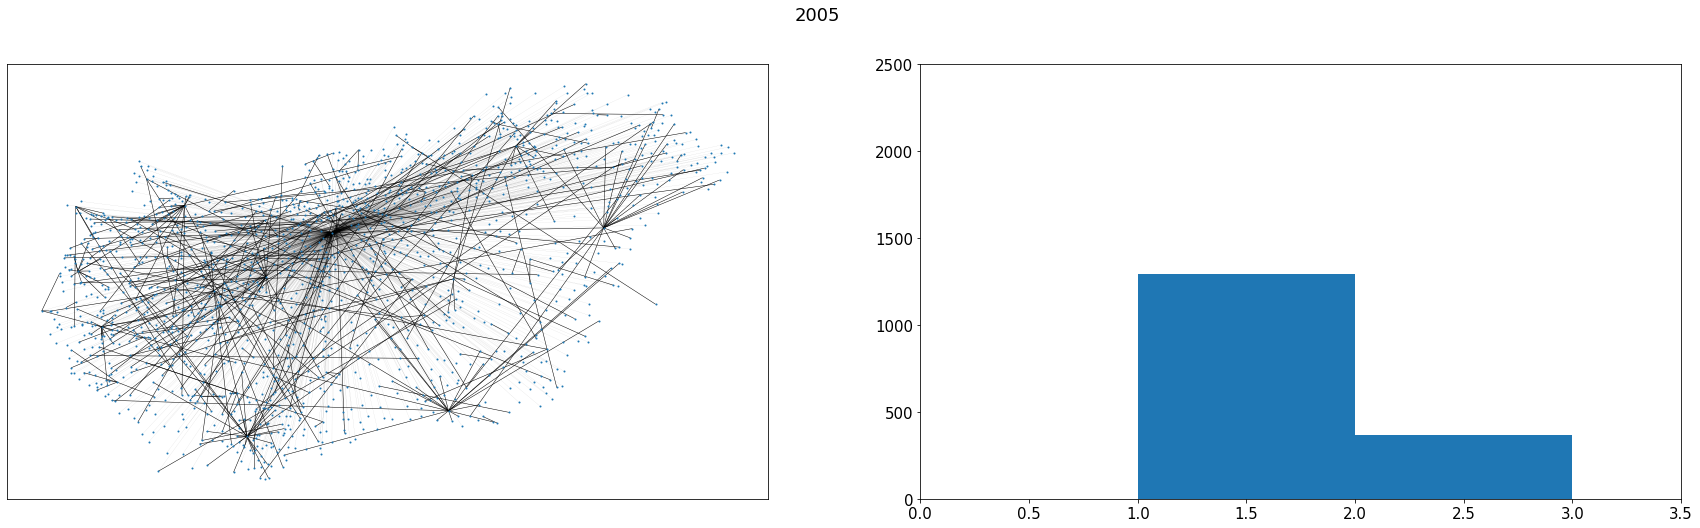

2012 mennyire fa 48


/home/bokanyie/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "density" which is no longer supported as of 3.3 and will become an error two minor releases later


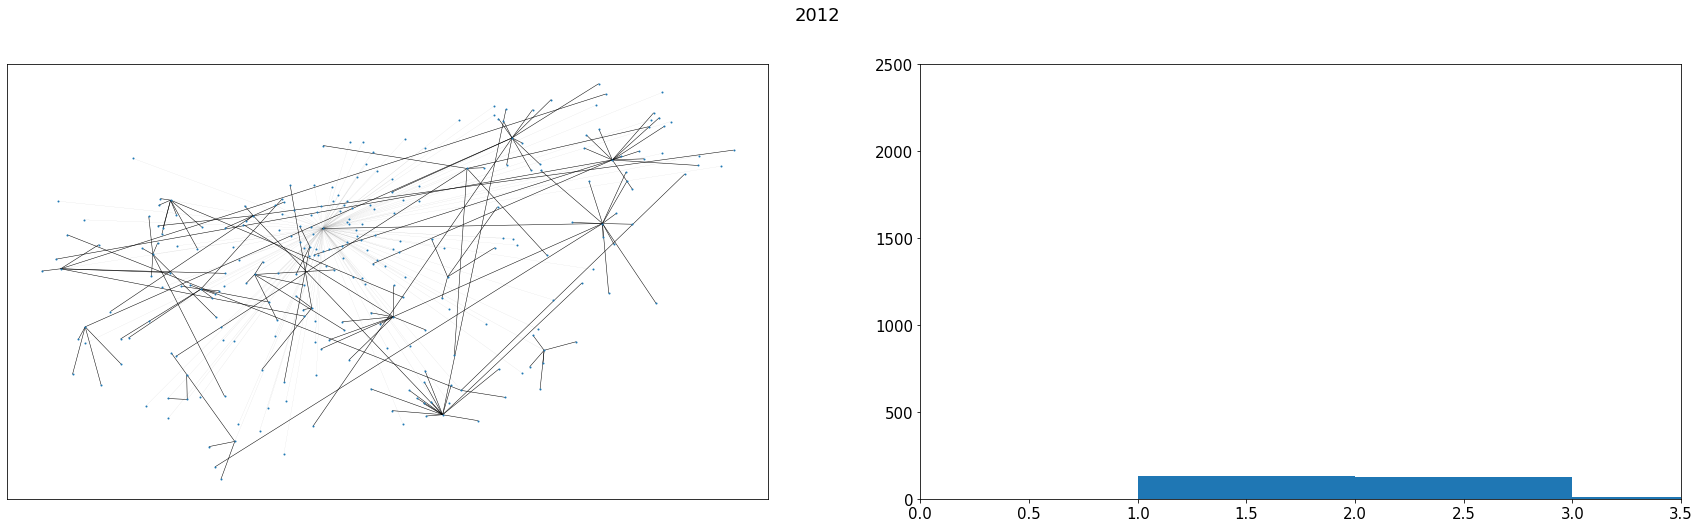

2009 mennyire fa 24


/home/bokanyie/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "density" which is no longer supported as of 3.3 and will become an error two minor releases later


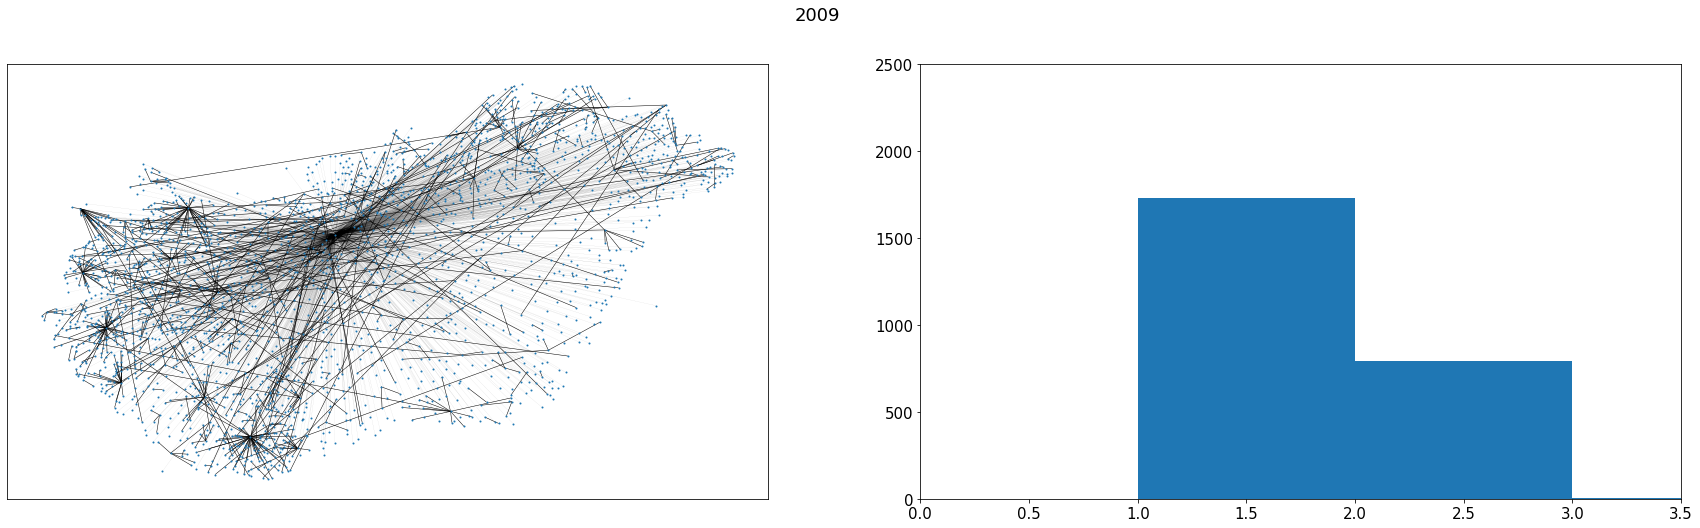

2004 mennyire fa 19


/home/bokanyie/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "density" which is no longer supported as of 3.3 and will become an error two minor releases later


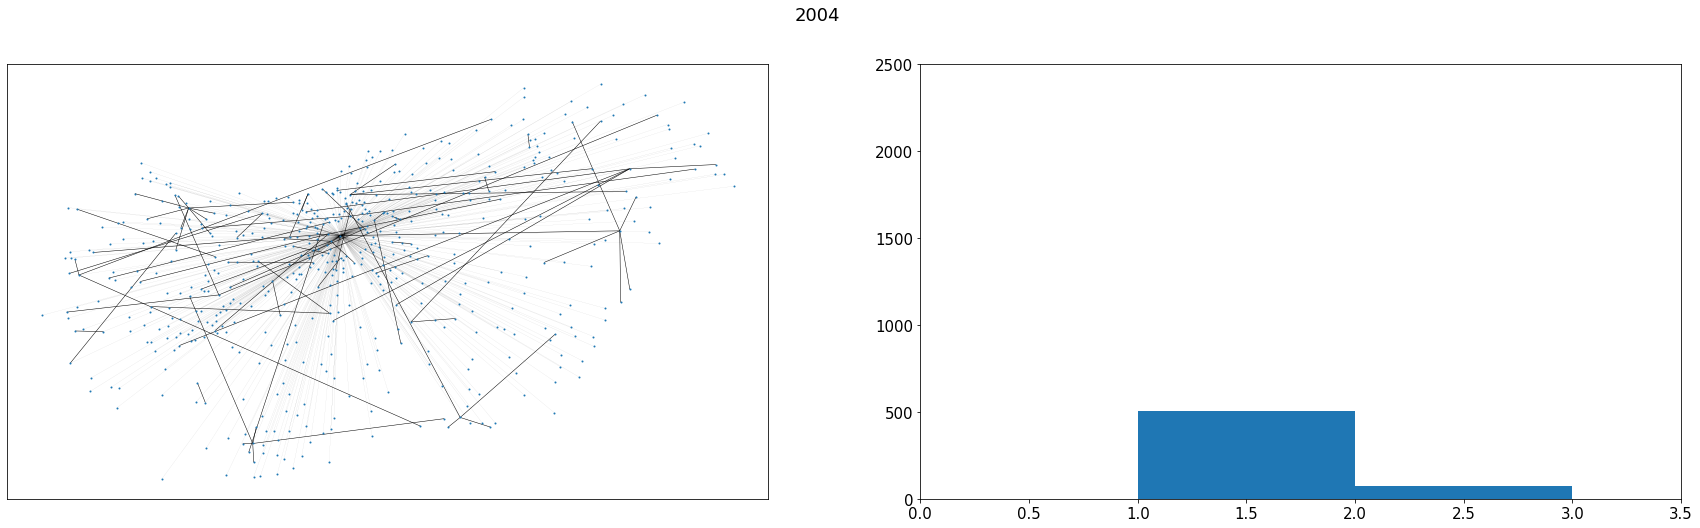

2003 mennyire fa 9


/home/bokanyie/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "density" which is no longer supported as of 3.3 and will become an error two minor releases later


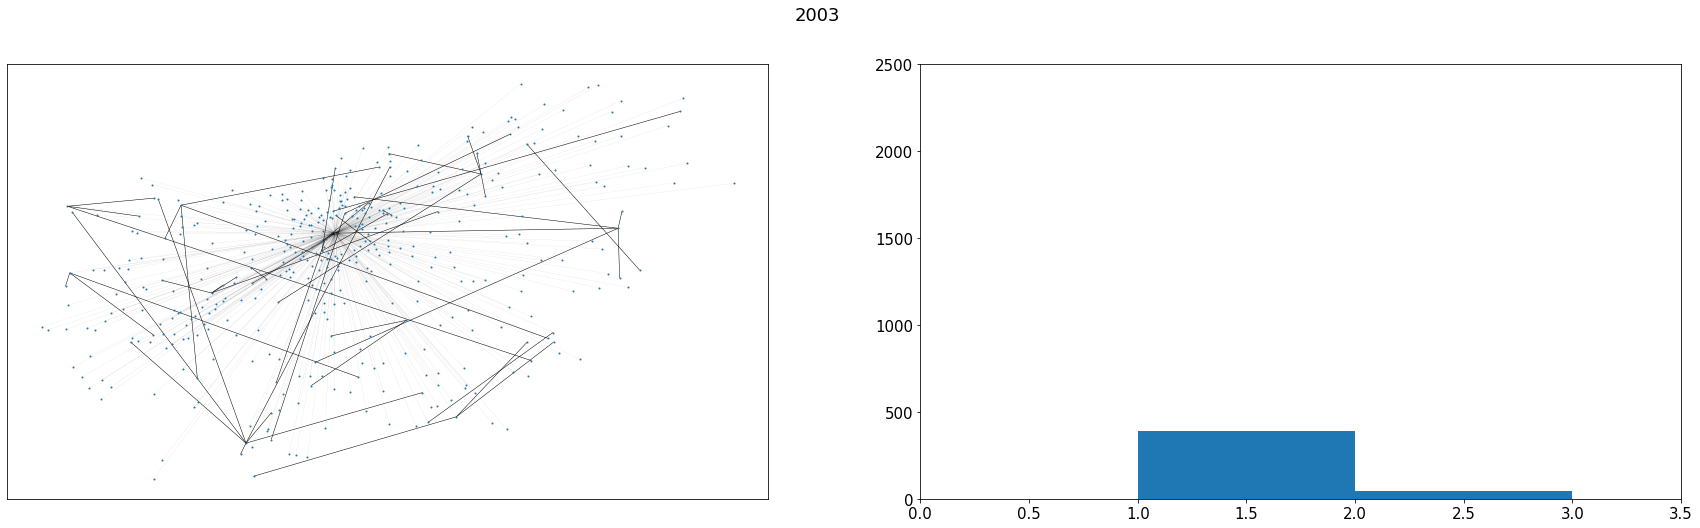

2011 mennyire fa 259


/home/bokanyie/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "density" which is no longer supported as of 3.3 and will become an error two minor releases later


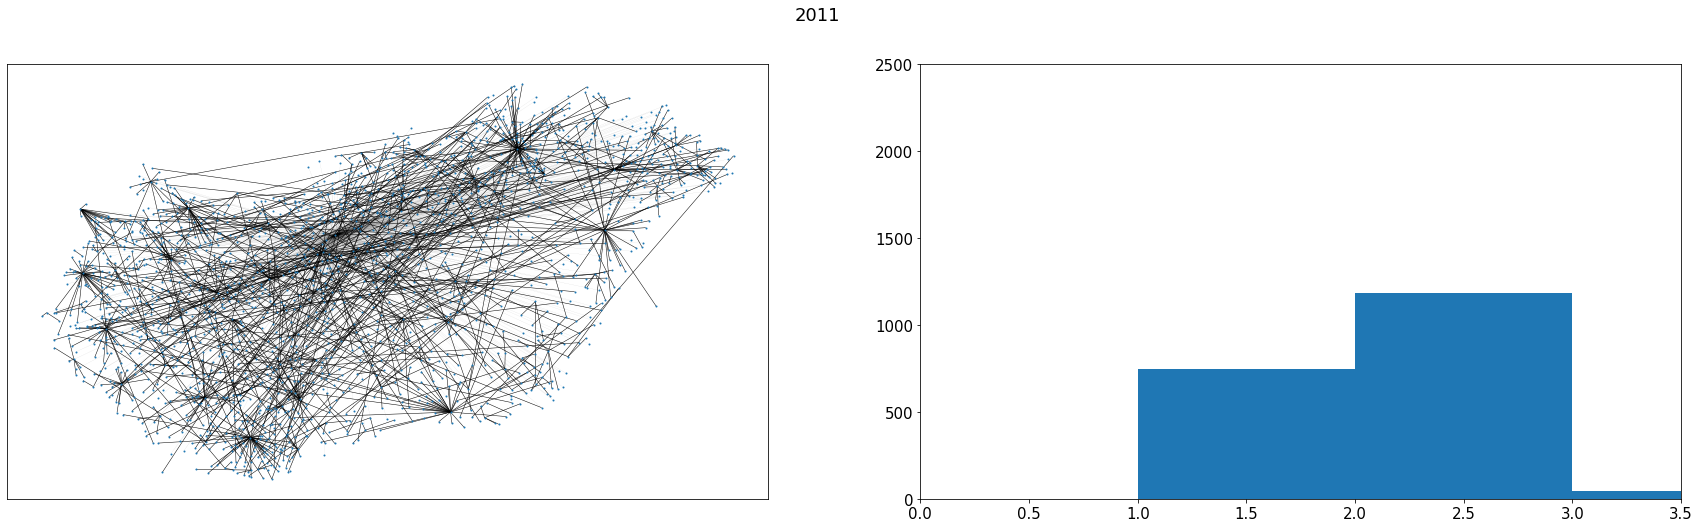

2010 mennyire fa 32


/home/bokanyie/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "density" which is no longer supported as of 3.3 and will become an error two minor releases later


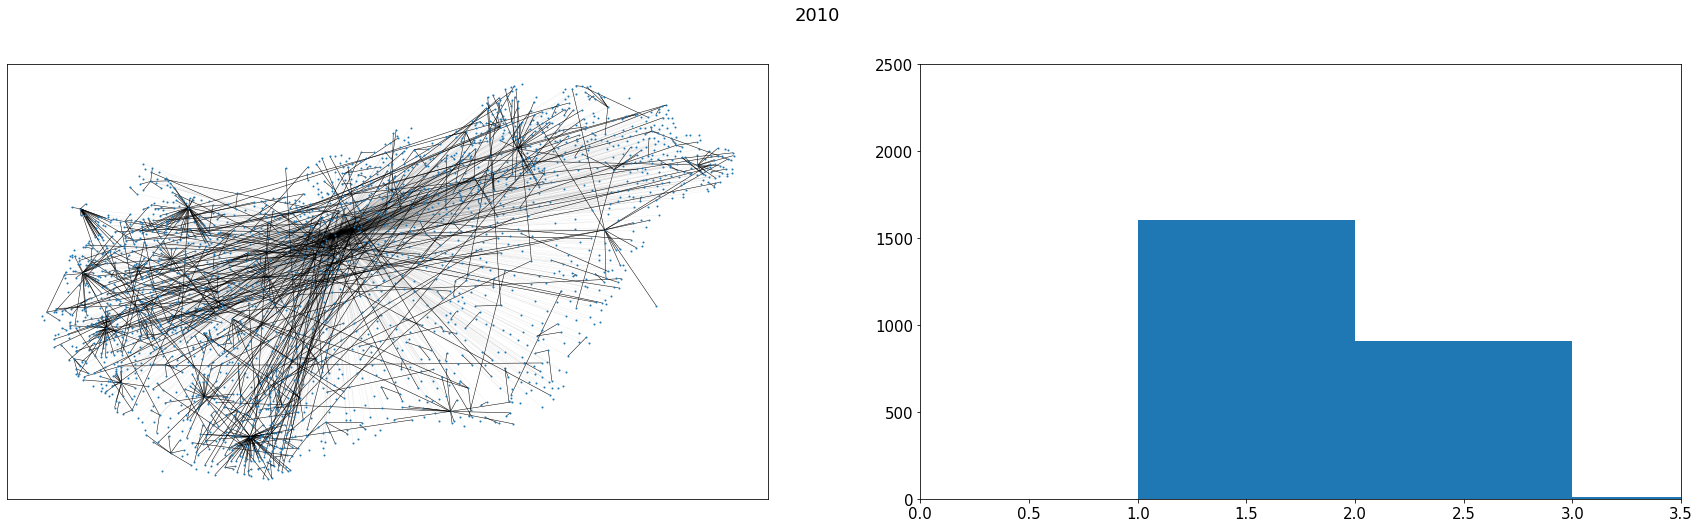

2006 mennyire fa 26


/home/bokanyie/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "density" which is no longer supported as of 3.3 and will become an error two minor releases later


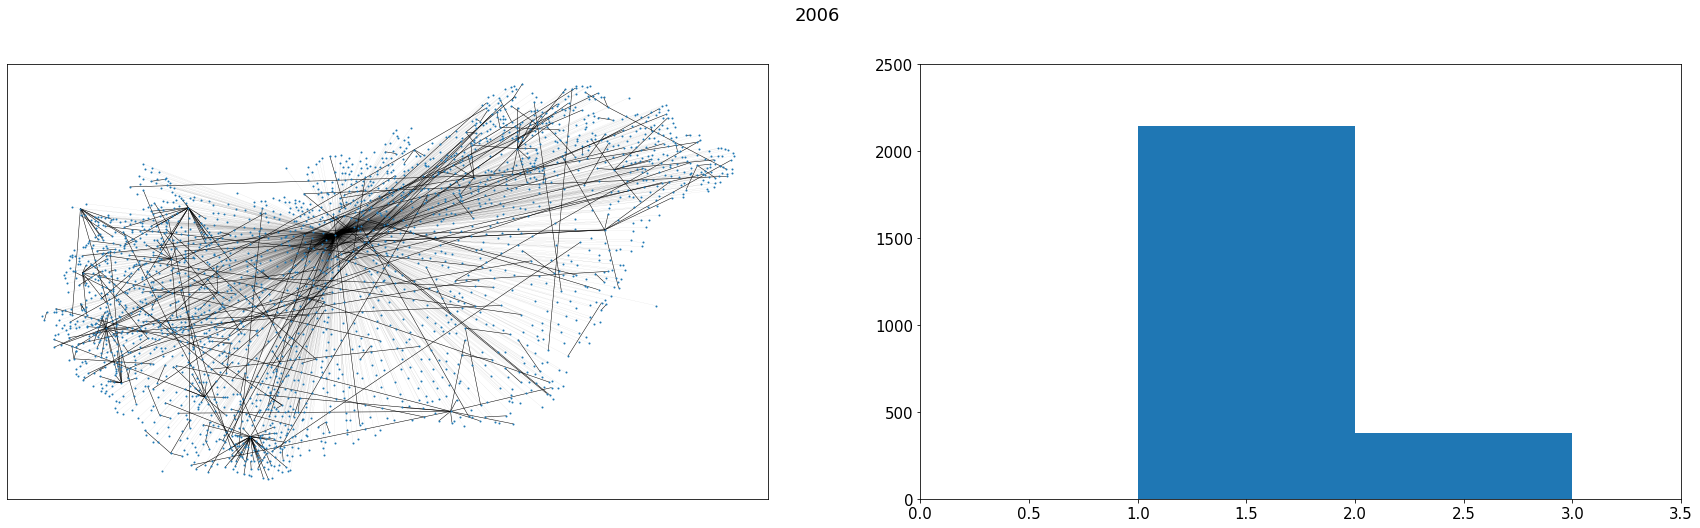

2007 mennyire fa 2


/home/bokanyie/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "density" which is no longer supported as of 3.3 and will become an error two minor releases later


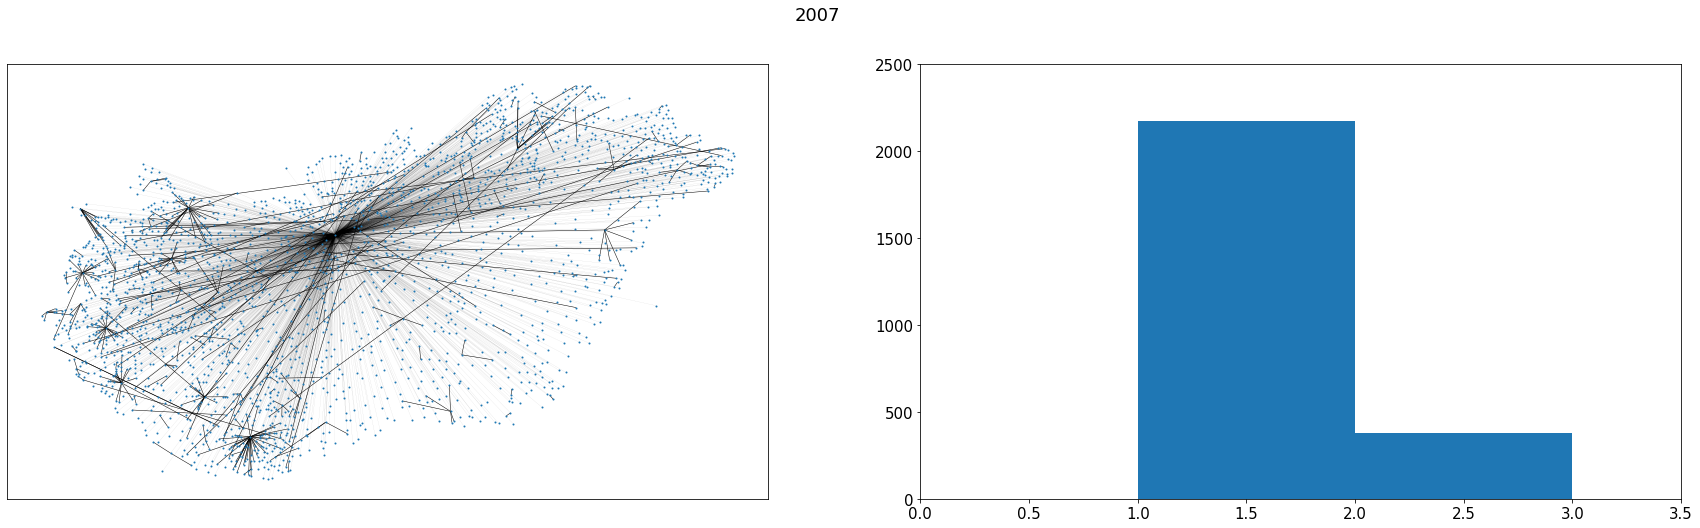

2008 mennyire fa 13


/home/bokanyie/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "density" which is no longer supported as of 3.3 and will become an error two minor releases later


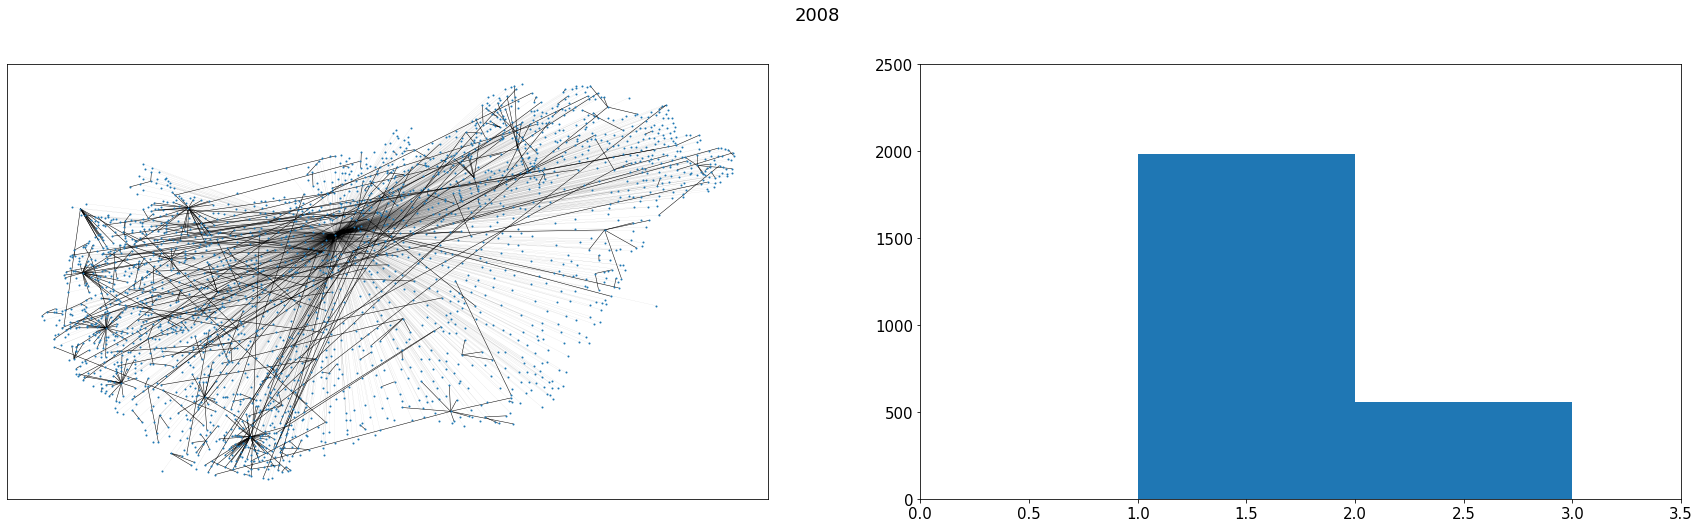

In [6]:
for f in os.listdir('edgelists_yearlyslice/'):
    if 'edgelist' in f:
        # ev a fajlnevbol
        year = f.split('_')[1].split('-')[0]
        elist  = pd.read_csv('edgelists_yearlyslice/'+f,index_col=0)

        # Normalizing outgoing edge weights to get outgoing probability
        # creating $-\log(p)$ as future edge weights.
        norm = elist.groupby('InvitorCityId').sum()['NumOutInvs'].to_dict()
        elist['norm'] = elist['InvitorCityId'].map(norm)
        elist['p'] = elist['NumOutInvs'] / elist['norm']
        elist['weight'] = elist['p'].map(np.log)*(-1)

        # sulyozott graf
        G = nx.DiGraph()
        G.add_weighted_edges_from(elist[elist['norm']>=20][['InvitorCityId','CityId','weight']].values,weight='weight')

        # legrovidebb eleresi utak Budapestrol
        tree_l = nx.shortest_paths.weighted.single_source_dijkstra_path_length(G,source=379)

        # pontos elek grafja
        elist['source_l'] = elist['InvitorCityId'].map(tree_l)
        elist['target_l'] = elist['CityId'].map(tree_l)
        elist['diff_l'] = elist['target_l'] - elist['source_l']
        tlist = elist[np.abs(elist['diff_l']-elist['weight'])<1e-5]

        T = nx.Graph()
        T.add_edges_from(tlist[['CityId','InvitorCityId']].values)
        
        # mennyire faszeru a pontos elek grafja (~hany olyan csucs van, ahova tobb regrovidebb utvonal is megy)
        budapest_component_nodes = [c for c in nx.connected_components(T) if 379 in c][0]
        budapest_component  = nx.subgraph(T,budapest_component_nodes)
        print(year,"mennyire fa",len(budapest_component.edges())-len(budapest_component.nodes()))
        
        # hany lepesben ertem el a telepulest Budapestrol
        nlist['steps_'+year] = nlist['CityId'].map(nx.shortest_paths.single_source_dijkstra_path_length(T,source=379,weight=None))

        # poltolas
        fig,ax = plt.subplots(1,2,figsize=(30,8))
        nx.draw_networkx_nodes(T,pos,node_size=1,ax=ax[0])
        nx.draw_networkx_edges(T,pos,width=[0.03 if u==379 else 0.5 for u,v in T.edges()],ax=ax[0])
        ax[1].hist(nlist['steps_'+year],bins=4,range=(0,4))
        ax[1].set_xlim(0,3.5)
        ax[1].set_ylim(0,2500)
        fig.suptitle(year)
        plt.savefig('./figs/' + year +'_hierarchy.png',density=600)
        plt.show()

In [ ]:
# elhagyjuk a nagyon kis faluk kimeno eleit -> Akos abrai alapjan nem lesz nagy hiba

# Shapes


In [48]:
# read in shapefile
varosok = gpd.read_file('./terkep/OSN_region.shp')

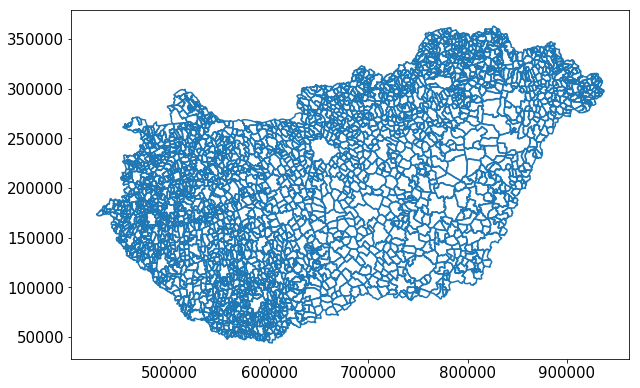

In [18]:
# have a look inside
varosok.boundary.plot()
# this is in EOV coordinate system: EPSG:23700!!!
# the nodelist file was EPSG:4326 (lon,lat)

In [19]:
varosok.head()

KSHKOD      HELYES  KSHK  USERRATE  CONNECTIVI   LN_USE  LN_CONN   LN_POP  \
0    1737         Aba  1737   26.6423     119.504  3.28250  4.78335  8.44312   
1    1244  Abádszalók  1244   19.1453     138.334  2.95206  4.92967  8.46105   
2    1254    Abaliget  1254   26.9865     125.828  3.29534  4.83491  6.50279   
3    2455      Abasár  2455   28.4624     109.753  3.34858  4.69824  7.87131   
4    1566  Abaújalpár  1566    0.0000       0.000  0.00000  0.00000  4.36945   

   LN_BP_KM   TAXPAY  ...  ISDN_CABLE      LIBR     BOOK     CULT    PC_ISK  \
0   4.40354  43.9586  ...     7.33104   6.22442  19.1834   0.0000   9.69201   
1   5.02197  36.1540  ...     8.06452  10.87370  31.4222  18.6165   7.40427   
2   5.39140  37.7811  ...     6.21118   0.00000   0.0000   0.0000  11.99400   
3   4.41425  44.4105  ...     8.64765   7.59252  30.4221   0.0000   7.24914   
4   5.40056  20.2532  ...     9.52381   0.00000   0.0000   0.0000   0.00000   

     INTISK  PCUSEISK       SALARY    TELCOM  \
0  0.215378   91.7510  1389.208721  0.068103   
1  0.211551   98.1595  1195.395553 -0.733452   
2  1.499250   37.4813  1229.138889 -0.099690   
3  0.381534   50.7440  1623.921821  0.960454   
4  0.000000    0.0000  1154.687500 -0.357491   

                                            geometry  
0  POLYGON ((607990.3199999999 193902.27, 608020 ...  
1  POLYGON ((760867 239566, 761030 240672, 761280...  
2  POLYGON ((574303 91680, 574789 91530, 574879 9...  
3  POLYGON ((722942 279255, 723238 278890, 723603...  
4  POLYGON ((811849 331856, 812217 332312, 812602...  

[5 rows x 22 columns]

In [21]:
# somehow we should connect the map to the network data
iwiw_codes = nlist.set_index('CityName')['CityId'].to_dict()

In [54]:
# adding nodelist index to map
varosok['iwiw_code'] = varosok['HELYES']\
    .str.normalize('NFKD')\
    .str.encode('ascii', errors='ignore')\
    .str.decode('utf-8').map(iwiw_codes)

Checking how many settlements are not within the nodelist.

In [42]:
len(varosok.index)

3135

In [44]:
len(nlist.index)

2555

Nem minden telepuleshez tartozik node! -> Balazs/Martin?

In [46]:
len(varosok[pd.isnull(varosok['iwiw_code'])].index) + len(nlist.index)

3133

Mapping the nodelist log population to the map.

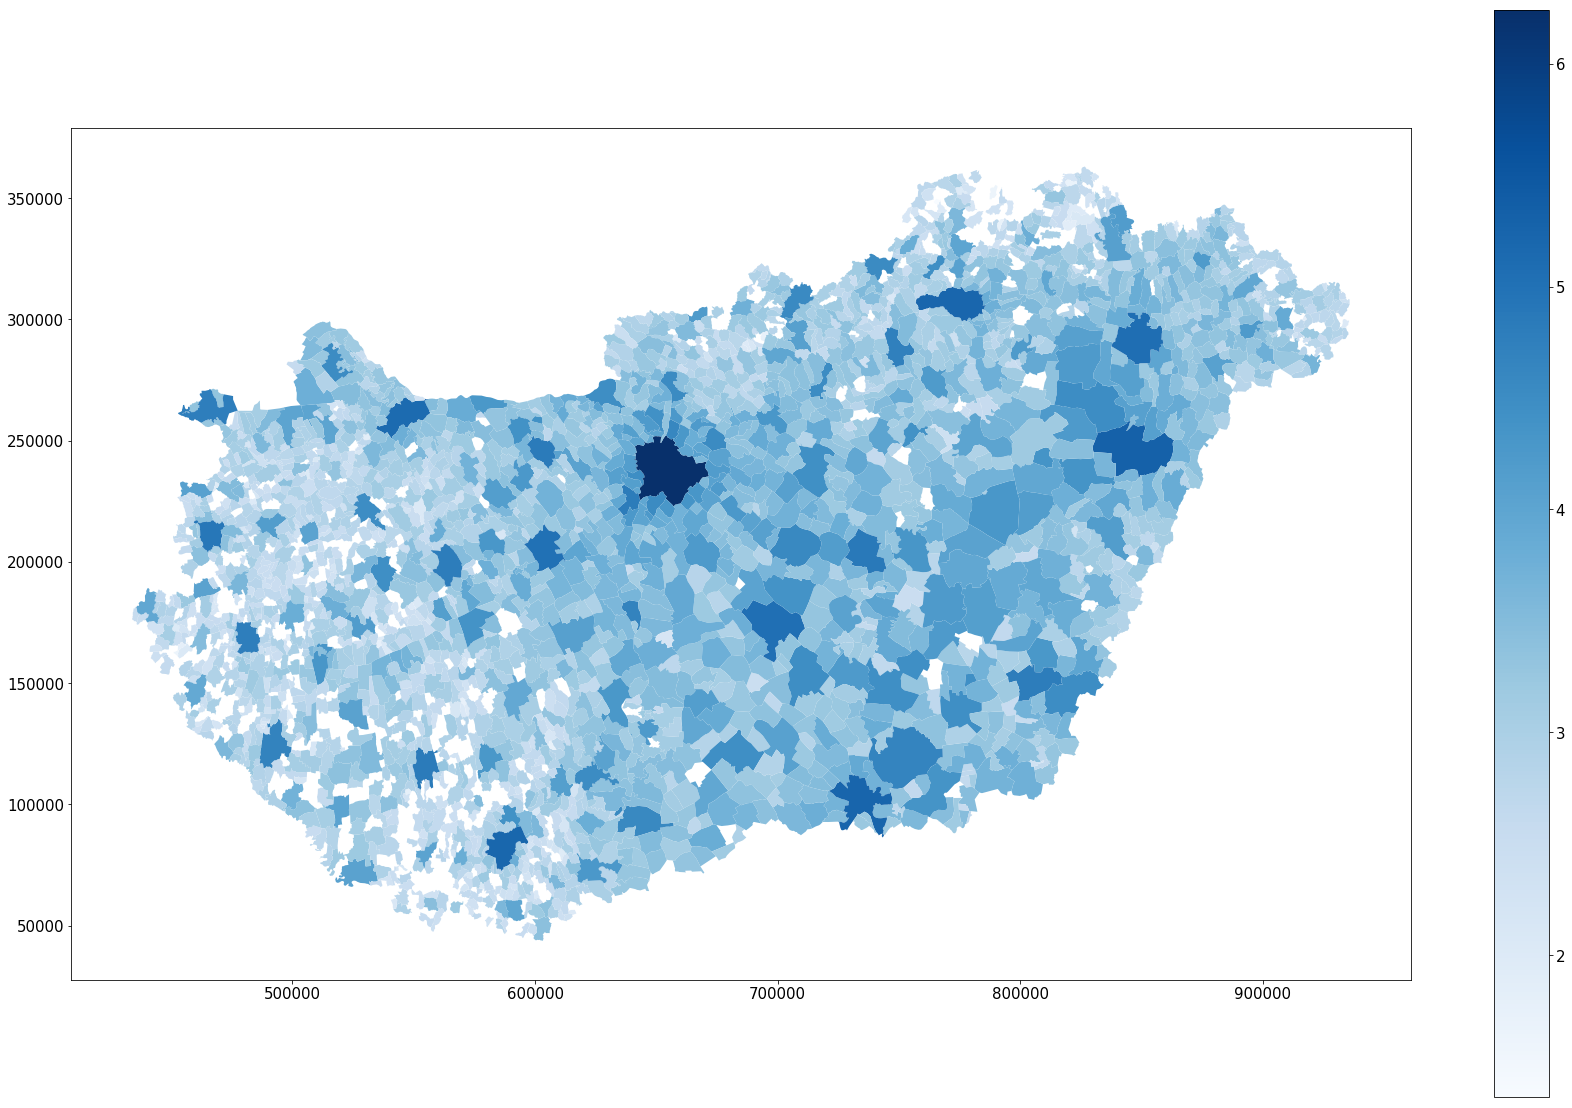

In [67]:
varosok['PopLog'] = varosok['iwiw_code'].map(nlist.set_index('CityId')['PopLog'].to_dict())

varosok.dropna(subset=['PopLog']).plot(column='PopLog',cmap='Blues',legend=True,figsize=(30,20))

Mean steps to reach settlement with the Dijkstra method from Budapest throughout years 2005-2012.

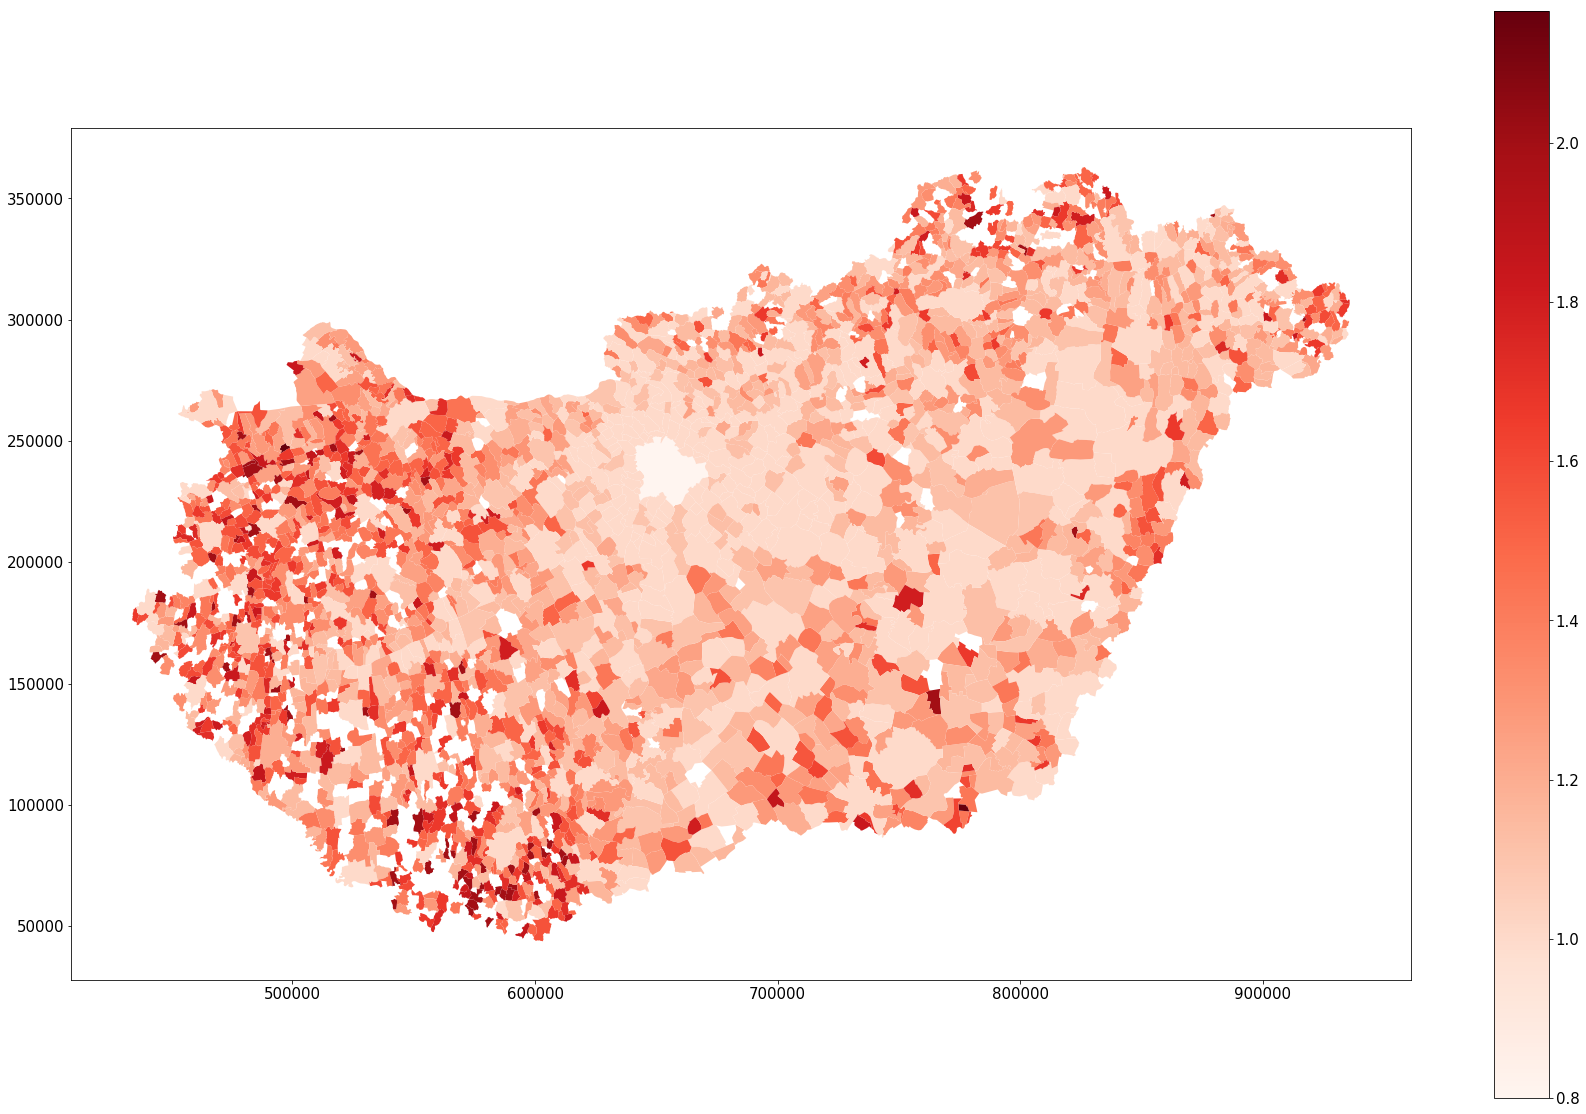

In [72]:
varosok['mean_steps'] = varosok['iwiw_code'].map(nlist.set_index('CityId')[[c for c in nlist.columns if "step" in c]].mean(axis=1).to_dict())

varosok.dropna(subset=['mean_steps']).plot(column='mean_steps',cmap='Reds',legend=True,figsize=(30,20),vmin=0.8)